<a href="https://colab.research.google.com/github/LeszekBlazewski/MTSwM/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import glob
%cd /content/gdrive/My Drive/Colab Notebooks/MTSwM

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/MTSwM


# Dataset classes and features

In [2]:
dataset_classes = {
    1:"Pain of non-heart origin",
    2:"Angina prectoris",
    3:"Angina prectoris - prizmental variant",
    4:"Myocardial infraction (transmural)",
    5:"Myocardial infraction (subendocardial)"
}

dataset_columns = [
    'Age',
    'Sex',
    # Pain
    'Pain location', 
    'Chest pain radiation', 
    'Pain character', 
    'Onset of pain', 
    'Number of hours since onset', 
    'Duration of the last episode', 
    # Associated symptoms
    'Nausea', 
    'Diaphoresis',
    'Palpitations',
    'Dyspnea',
    'Dizziness/syncope',
    'Burping',
    # Palliative factors
    'Palliative factors',
    # History of similar pain
    'Prior chest pain of this type',
    'Physician consulted for prior pain',
    'Prior pain related to heart',
    'Prior pain due to MI',
    'Prior pain due to angina prectoris',
    # Past medical history
    'Prior MI',
    'Prior angina prectoris',
    'Prior atypical chest pain',
    'Congestive heart failure',
    'Peripheral vascular disease',
    'Hiatal hernia',
    'Hypertension',
    'Diabetes',
    'Smoker',
    # Current medication usage
    'Diuretics',
    'Nitrates',
    'Beta blockers',
    'Digitalis',
    'Nonsteroidal anti-inflammator',
    'Antacids/H2 blockers',
    # Physical examinations
    'Systolic blood pressure',
    'Diastolic blood pressure',
    'Heart rate',
    'Respiration rate',
    'Rales',
    'Cyanosis',
    'Pallor',
    'Systolic murmur',
    'Diastolic murmur',
    'Oedema',
    'S3 gallop',
    'S4 gallop',
    'Chest wall tenderness',
    'Diaphoresis',
    # ECG examination
    'New Q wave',
    'Any Q wave',
    'New ST segment elevation',
    'Any ST segment elevation',
    'New ST segment depression',
    'Any ST segment depression',
    'New T wave inversion',
    'Any T wave inversion',
    'New intraventricular conduction defect',
    'Any intraventricular conduction defect',
    'Class'
]

# Load & merge datasets

In [3]:
data_list = []

for i, file in enumerate(glob.glob("data/*.txt"), 1):
  data_set = pd.read_csv(file,sep="\t", header=None).transpose()
  data_set['Class'] = i
  data_list.append(data_set)

dataset = pd.concat(data_list, axis=0)

dataset.columns = dataset_columns

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 262
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     901 non-null    int64
 1   Sex                                     901 non-null    int64
 2   Pain location                           901 non-null    int64
 3   Chest pain radiation                    901 non-null    int64
 4   Pain character                          901 non-null    int64
 5   Onset of pain                           901 non-null    int64
 6   Number of hours since onset             901 non-null    int64
 7   Duration of the last episode            901 non-null    int64
 8   Nausea                                  901 non-null    int64
 9   Diaphoresis                             901 non-null    int64
 10  Palpitations                            901 non-null    int64
 11  Dyspnea            

# Features ranking

## SelectKBest

In [4]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

def build_features_ranking(x, y, score_func):
    features_num = x.shape[1]
    k_best_selector = SelectKBest(score_func=score_func, k=features_num) 
    k_best_selector.fit(x, y)
    scores_ranking = [
        (name, round(score, 2))
        for name, score in zip(x.columns, k_best_selector.scores_)
    ]
    scores_ranking.sort(reverse=True, key=lambda x: x[1])
    return scores_ranking

In [5]:
def print_features_ranking_with_plot(features_ranking, used_score_func):
  print(f'Features ranking after using {used_score_func} score function:')
  for i, feature in enumerate(features_ranking, 1):
    print(f"{i}. {feature[0]} {feature[1]}")
  # display bar plot
  plt.figure(figsize=(30,20))
  estimator_num = len(features_ranking)
  # sort ascending because horizontal bars print in reverse order
  ascending_features = sorted([(f[0], f[1]) for f in features_ranking], key=lambda f: f[1])
  plt.barh(range(estimator_num), [feature[1] for feature in ascending_features], align='center') # extract score value
  plt.yticks(range(estimator_num), [feature[0] for feature in ascending_features]) # extract the feature label
  plt.title(f'Ranking based on {used_score_func}')
  plt.show()
  plt.savefig(fname='ranking.png', orientation='landscape')

Features ranking after using f_classif score function:
1. New ST segment depression 304.24
2. New ST segment elevation 237.16
3. New Q wave 229.16
4. Any ST segment depression 205.43
5. New T wave inversion 180.8
6. Systolic blood pressure 146.52
7. New intraventricular conduction defect 132.6
8. Any T wave inversion 114.27
9. Number of hours since onset 95.74
10. Prior pain related to heart 91.66
11. Pain location 90.97
12. Any Q wave 90.55
13. Respiration rate 89.65
14. Any intraventricular conduction defect 87.17
15. S3 gallop 83.8
16. Palpitations 74.79
17. Diastolic murmur 74.17
18. Prior angina prectoris 71.71
19. Dizziness/syncope 55.57
20. Congestive heart failure 55.24
21. Any ST segment elevation 52.26
22. S4 gallop 51.23
23. Hiatal hernia 49.76
24. Prior atypical chest pain 47.42
25. Systolic murmur 47.26
26. Prior pain due to angina prectoris 45.89
27. Chest wall tenderness 42.72
28. Nitrates 40.13
29. Burping 36.7
30. Prior pain due to MI 36.53
31. Rales 36.47
32. Antacids

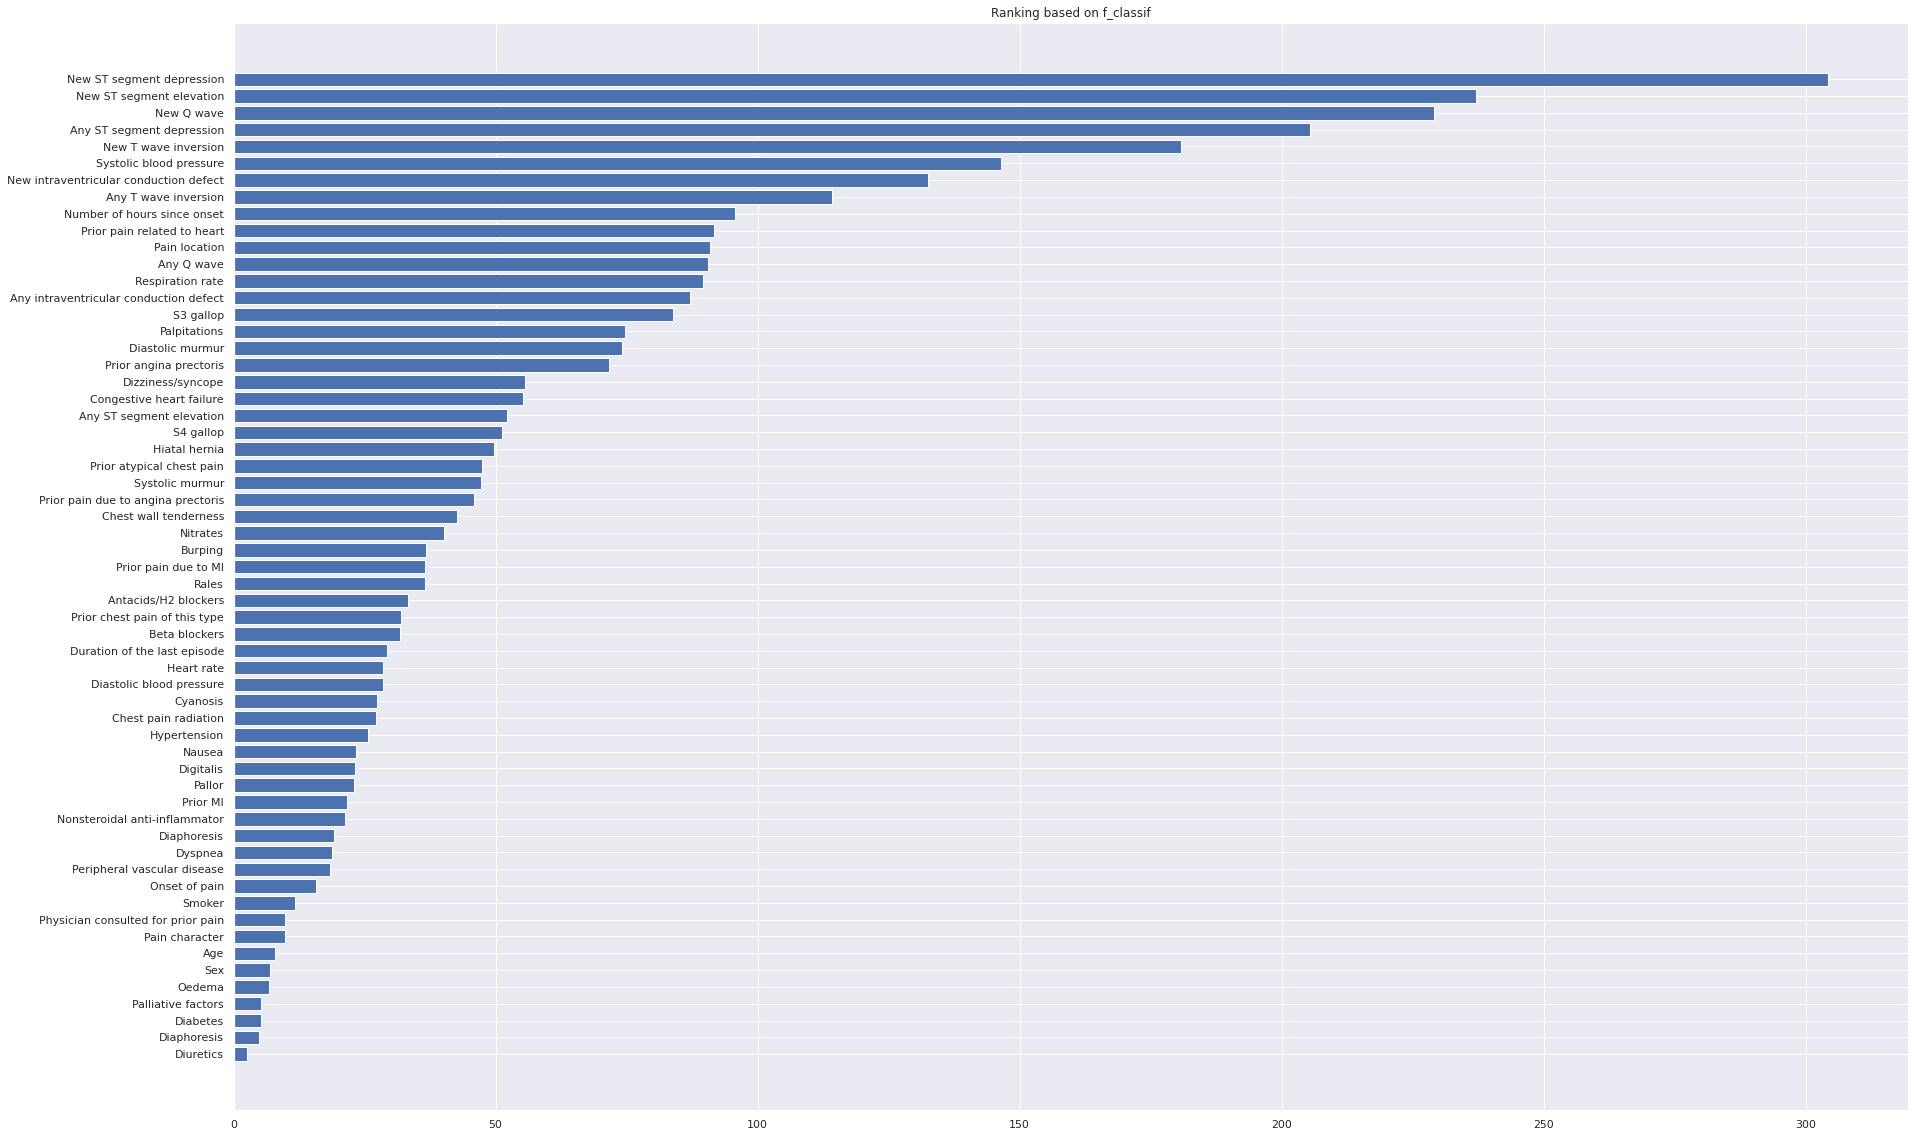

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn.feature_selection import chi2, f_classif

x = dataset.drop('Class', axis=1)
y = dataset['Class']
# f_classif: ANOVA test (F-value between label/feature for regression tasks)
features_ranking_classif = build_features_ranking(x, y, f_classif)
print_features_ranking_with_plot(features_ranking_classif, 'f_classif')
# chi-squared stats of non-negative features for classification tasks.
# features_ranking_chi = build_features_ranking(x, y, chi2)
# print_features_ranking_with_plot(features_ranking_chi, 'chi2')

# Experiment

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix

clfs = {
    'k1euclidean': KNeighborsClassifier(n_neighbors=1, metric='euclidean'),
    'k5euclidean': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'k10euclidean': KNeighborsClassifier(n_neighbors=10, metric='euclidean'),
    'k1manhattan': KNeighborsClassifier(n_neighbors=1, metric='manhattan'),
    'k5manhattan': KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    'k10manhattan': KNeighborsClassifier(n_neighbors=10, metric='manhattan'),
}

X = dataset.drop('Class', axis=1)
number_of_features = len(X.columns)
y = dataset['Class']
n_splits = 2
n_repeats = 5
score_func = f_classif
rskf = RepeatedStratifiedKFold(
    n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# stores result of each KFold run
scores = np.zeros((len(clfs), number_of_features, n_splits * n_repeats))
# stores accumulated conf_matrixes (sum of all matrixes for whole KFold run)
confusion_matrixes = np.zeros((len(clfs),number_of_features), dtype=np.ndarray)


for features_index in range(0,number_of_features):
  selected_features_count = features_index + 1
  k_best_selector = SelectKBest(score_func=score_func, k=selected_features_count)
  selected_data = k_best_selector.fit_transform(X, y)
  for fold_id, (train_index, test_index) in enumerate(rskf.split(selected_data, y)):
      for clf_id, clf_name in enumerate(clfs):
          X_train, X_test = selected_data[train_index], selected_data[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          clf = clone(clfs[clf_name])
          clf.fit(X_train, y_train)
          y_pred = clf.predict(X_test)
          scores[clf_id, features_index, fold_id] = accuracy_score(y_test, y_pred)
          confusion_matrixes[clf_id, features_index] += confusion_matrix(y_test, y_pred)


np.save('results', scores)
np.save('conf_matrixes',confusion_matrixes)

# Results

## All classifier stats and Confusion matrix for best one

classifier_name,num_of_features,mean,std
classifier:k1euclidean
feat_count: 1,mean_score: 0.512, std: (0.01)
feat_count: 2,mean_score: 0.491, std: (0.08)
feat_count: 3,mean_score: 0.517, std: (0.02)
feat_count: 4,mean_score: 0.556, std: (0.03)
feat_count: 5,mean_score: 0.535, std: (0.05)
feat_count: 6,mean_score: 0.567, std: (0.01)
feat_count: 7,mean_score: 0.559, std: (0.02)
feat_count: 8,mean_score: 0.562, std: (0.02)
feat_count: 9,mean_score: 0.578, std: (0.01)
feat_count: 10,mean_score: 0.586, std: (0.01)
feat_count: 11,mean_score: 0.597, std: (0.02)
feat_count: 12,mean_score: 0.600, std: (0.02)
feat_count: 13,mean_score: 0.622, std: (0.02)
feat_count: 14,mean_score: 0.625, std: (0.02)
feat_count: 15,mean_score: 0.626, std: (0.02)
feat_count: 16,mean_score: 0.631, std: (0.02)
feat_count: 17,mean_score: 0.631, std: (0.02)
feat_count: 18,mean_score: 0.634, std: (0.02)
feat_count: 19,mean_score: 0.637, std: (0.02)
feat_count: 20,mean_score: 0.635, std: (0.02)
feat_count: 21,mean_score

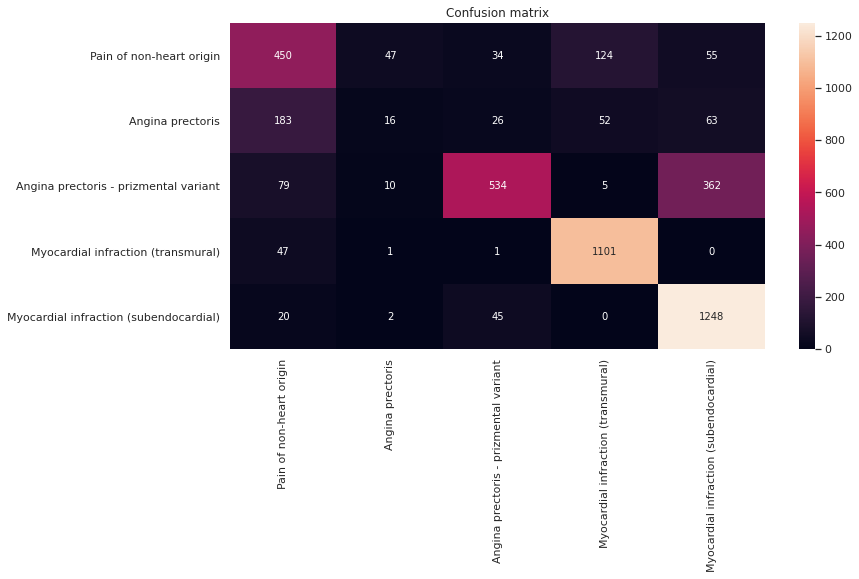

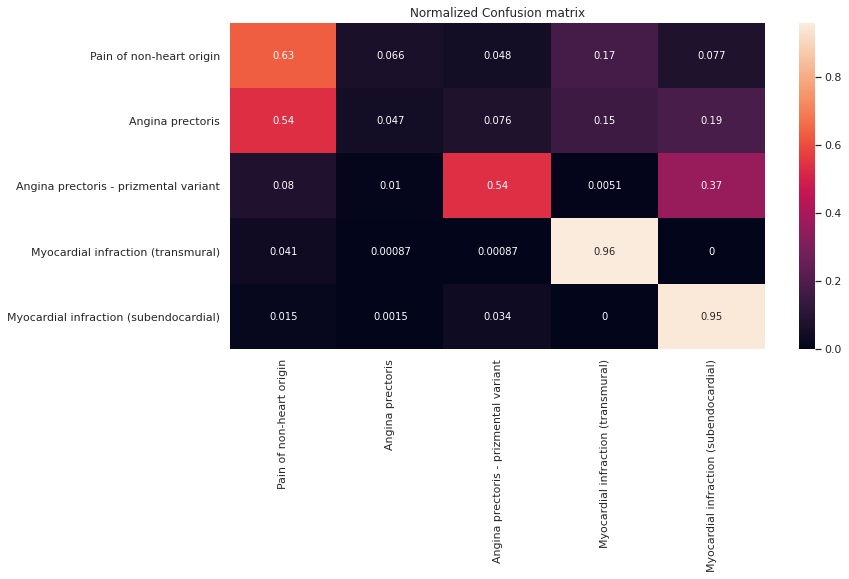

In [8]:
scores = np.load('results.npy')
confusion_matrixes = np.load('conf_matrixes.npy', allow_pickle=True)
number_of_features = len(X.columns)
# means and stds array have indexes: [clf_id][feature_index]
means = np.mean(scores,axis=2)
stds = np.std(scores,axis=2)


print("classifier_name,num_of_features,mean,std")
for clf_id, clf_name in enumerate(clfs):
  print(f"classifier:{clf_name}")
  for feature_index in range(0,number_of_features):
    current_classifier_mean = means[clf_id,feature_index]
    print("feat_count: %d,mean_score: %.3f, std: (%.2f)" % (feature_index+1, current_classifier_mean, stds[clf_id,feature_index]))


# Best result
best_acc = np.max(means)
best_clf_id = np.argmax(np.max(means, axis=1))
best_feature_index = np.argmax(np.max(means, axis=0))

print(f"\nBest result: {best_acc} with classifier {list(clfs.keys())[best_clf_id]} and feature_count equal {best_feature_index + 1}")

best_conf_matrix = confusion_matrixes[best_clf_id, best_feature_index] # extract confusion matrix for best classifier 
normalized_best_conf_matrix = best_conf_matrix.astype('float') / best_conf_matrix.sum(axis=1)[:, np.newaxis]
# prepare confusion matrixes
df_cm = pd.DataFrame(best_conf_matrix,dataset_classes.values(),dataset_classes.values())
df_cm_normalized = pd.DataFrame(normalized_best_conf_matrix,dataset_classes.values(),dataset_classes.values())
# plot final matrix & normlized matrix
plt.figure(figsize=(12,6))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.figure(figsize=(12,6))
sns.heatmap(df_cm_normalized, annot=True)
plt.title('Normalized Confusion matrix')
plt.show()

## Plots

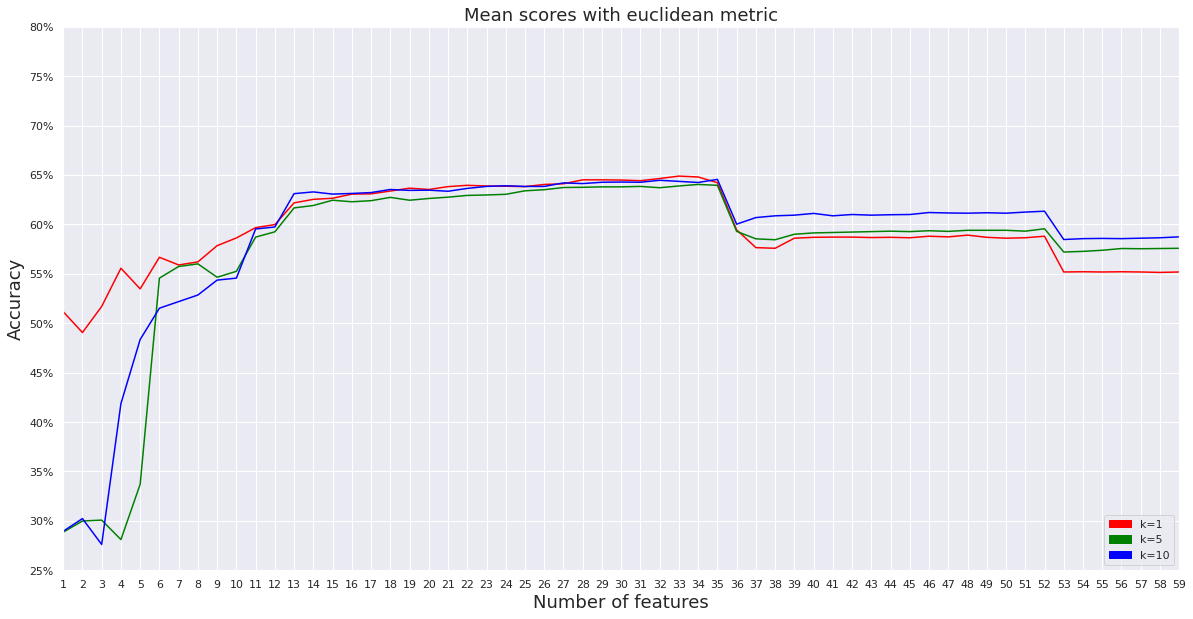

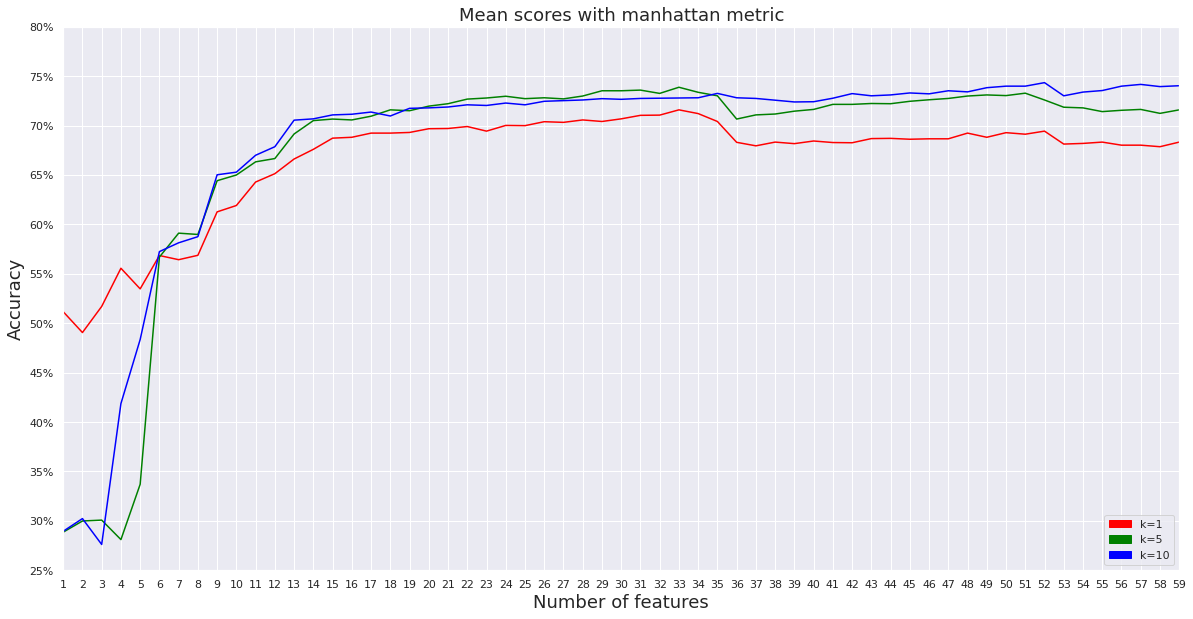

In [9]:
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

def plot_classifier_series(feature_range, classifiers, means, legend_patches):
  plt.figure(figsize=(20,10))
  for index,clf in enumerate(classifiers):
    clf_id = list(clfs).index(clf[0])
    plt.plot(feature_range, means[clf_id], legend_patches[index]._original_facecolor)
  
  axes = plt.gca()
  axes.set_xlim([1,59])
  axes.set_ylim([25,80])
  x_ticks = np.arange(1,60,1)
  y_ticks = np.arange(25,81,5)
  plt.xticks(x_ticks)
  plt.yticks(y_ticks)
  axes.yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.xlabel('Number of features', fontsize=18)
  plt.ylabel('Accuracy', fontsize=18)
  plt.legend(handles=legend_patches,loc=4)
  plt.title(f"Mean scores with {classifiers[0][1].metric} metric",fontsize=18 )
  metric = classifiers[0][1].metric
  plt.savefig(fname=f'plot-{metric}.png')
  plt.show()


red_patch = mpatches.Patch(color='red', label='k=1')
green_patch = mpatches.Patch(color='green', label='k=5')
blue_patch = mpatches.Patch(color='blue', label='k=10')
legend_patches=[red_patch,green_patch,blue_patch]

feature_range = np.arange(1,len(dataset_columns))
euclidean_classifiers = [clf for clf in clfs.items() if  clf[1].metric == 'euclidean']
manhattan_classifiers =  [clf for clf in clfs.items() if  clf[1].metric == 'manhattan']
means_in_percentage = (means*100)

plot_classifier_series(feature_range,euclidean_classifiers,means_in_percentage,legend_patches)
plot_classifier_series(feature_range,manhattan_classifiers,means_in_percentage,legend_patches)

# Statistics analysis

## Display table function


In [10]:
def display_matrixes_with_headers(matrixes, header, features_count,clfs):
  headers = [ clf_name for clf_name in clfs.keys()]
  names_column = np.array([ [header] for header in headers ])
  for i in range(features_count):
    current_matrix = matrixes[i]
    current_matrix_table = np.concatenate((names_column, current_matrix), axis=1)
    current_matrix_table = tabulate(current_matrix_table, headers, floatfmt=".2f")
    print(f"\n{header} for {i+1} feature:\n", current_matrix_table)


## Calculate t-statistic



In [11]:
from scipy.stats import ttest_ind
from tabulate import tabulate

# we calculate statistics only for 7 best features from ranking
# we end up with 7 matrmatrixes of size 6x6 where each value is the statistic score calculated for given classifier (1 of 6) and number of features tell which matrix it is

# list of all matrixes
t_statistic_matrixes = []
p_statistic_matrixes = []
features_count = 7

for _ in range(features_count):
  t_statistic_matrixes.append(np.zeros((len(clfs), len(clfs))))
  p_statistic_matrixes.append(np.zeros((len(clfs), len(clfs))))


# flatten the results to 2D 7x6
best_7_features_results = []

for feature_index in range(features_count):
  for clf_id in range(len(clfs)):
    best_7_features_results.append(scores[clf_id,feature_index])


# calculate statistics for each matrix
for matrix_id in range(features_count):
  for i in range(len(clfs)):
    for j in range(len(clfs)):
      t_statistic_matrixes[matrix_id][i][j], p_statistic_matrixes[matrix_id][i][j] = ttest_ind(best_7_features_results[i + matrix_id * 6], best_7_features_results[j + matrix_id * 6])


# display_matrixes_with_headers(t_statistic_matrixes,"t-statistic",features_count,clfs)


## Advantage

In [12]:
advantages = []

for _ in range(features_count):
  advantages.append(np.zeros((len(clfs), len(clfs))))

for index,t_statistic in enumerate(t_statistic_matrixes):
  advantages[index][t_statistic > 0] = 1

# display_matrixes_with_headers(advantages,"advantage",features_count,clfs)


## Significant statistic difference

In [13]:
alfa = .05
significances = []

for _ in range(features_count):
  significances.append(np.zeros((len(clfs), len(clfs))))

for index,p_value in enumerate(p_statistic_matrixes):
  significances[index][p_value <= alfa] = 1

# display_matrixes_with_headers(significances,"statistic significance (alpha = 0.05)",features_count,clfs)

## Final statistics result

In [14]:

stat_better_matrixes = []

for i in range(features_count):
  stat_better = significances[i] * advantages[i]
  stat_better_matrixes.append(stat_better)


display_matrixes_with_headers(stat_better_matrixes,"Statistically significantly better:",features_count,clfs)


Statistically significantly better: for 1 feature:
                 k1euclidean    k5euclidean    k10euclidean    k1manhattan    k5manhattan    k10manhattan
------------  -------------  -------------  --------------  -------------  -------------  --------------
k1euclidean            0.00           1.00            1.00           0.00           1.00            1.00
k5euclidean            0.00           0.00            0.00           0.00           0.00            0.00
k10euclidean           0.00           0.00            0.00           0.00           0.00            0.00
k1manhattan            0.00           1.00            1.00           0.00           1.00            1.00
k5manhattan            0.00           0.00            0.00           0.00           0.00            0.00
k10manhattan           0.00           0.00            0.00           0.00           0.00            0.00

Statistically significantly better: for 2 feature:
                 k1euclidean    k5euclidean    k10eucli